### Quick Evaluation of Models

In [ ]:
from tensorflow.keras.models import load_model

#Custom models
C1 = load_model("models/C1_cnn_4block_lr_0001.keras")
C2 = load_model("models/C2_cnn_3_32layers_oddFilterSizes_lr_0001.keras")
C3 = load_model("models/C3_cnn_3_16layers_oddFilterSizes_batchActivation_lr_0001_img254.keras")
C4 = load_model("models/C4_cnn_3_16-64ayers_batchActivation_lr_0001_img128.keras") 

#MobileNetV2 with new output layers before fine tuning
T1 = load_model("models/T1_256Dense_img128.keras")

#MobileNetV2 after fine tuning top 50 layers
T2 = load_model("models/T2_50_Dense256_img128.keras")

models = {C1, C2, C3, C4, T1, T2}
counter = 1
for model in models:
    print(f"\t ==== Model {counter} ===")
    loss, accuracy = model.evaluate(test_dataset) #IMPORTANT: run the cell below to initialize test_dataset
    print("\n")
    counter = 1 + counter


	 ==== Model 1 ===
	 ==== Model 1 ===
	 ==== Model 1 ===
	 ==== Model 1 ===
	 ==== Model 1 ===
	 ==== Model 1 ===


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, RandomFlip, RandomRotation, RandomZoom, RandomTranslation, Rescaling
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image


img_height = 128
img_width = 128
batch_size = 32

full_dataset = tf.keras.utils.image_dataset_from_directory(
        "Fruits Original",
        labels='inferred',
        label_mode='categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size,
        seed=456
    )
    
#split 60:20:20 for training:validation:evaluation
total_batches = tf.data.experimental.cardinality(full_dataset).numpy()
train_size = int(0.6 * total_batches)
val_size = int(0.2 * total_batches)
test_size = total_batches - train_size - val_size #not done with multiplication to avoid multiple overlap due to rounding

#split the dataset
train_dataset = full_dataset.take(train_size)
remaining = full_dataset.skip(train_size)
val_dataset = remaining.take(val_size)
test_dataset = remaining.skip(val_size)


data_augmentation = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomTranslation(0.1, 0.1)
])

normalization_layer = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))



Found 10154 files belonging to 15 classes.


In [ ]:
#Model configuration
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Activation
early = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
adam = Adam(learning_rate=0.0001)
sgd = SGD(learning_rate=0.001)


#img_height = img_width = 128
custom_cnn = Sequential([


    #TODO C1
    # Input(shape=(img_height, img_width, 3)),
    # Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'), #kernel_initializer='he_normal
    # Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_normal'), #kernel_initializer='he_normal
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.3),
    
    # Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Conv2D(64, (3, 3), padding='same', activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.3),

    # Conv2D(128, (3, 3), padding='same', activation='relu'),
    # Conv2D(128, (3, 3), padding='same', activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.3),

    # Conv2D(256, (3, 3), padding='same', activation='relu'),
    # Conv2D(256, (3, 3), padding='same', activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.3),

    # Flatten(),
    # Dense(64, activation='relu'),
    # Dropout(0.3),
    # Dense(15, activation='softmax'

    #TODO: C2
    # Input(shape=(img_height, img_width, 3)),
    # Conv2D(16, (3, 3), activation='relu'), #kernel_initializer='he_normal
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),
    
    
    # Conv2D(16, (5, 5), activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),

    # Conv2D(16, (7, 7), activation='relu'),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),

    # Flatten(),
    # Dense(64, activation='relu'),
    # Dropout(0.3),
    # Dense(15, activation='softmax')

    #TODO C3
    # Input(shape=(img_height, img_width, 3)),
    # Conv2D(16, (3, 3), kernel_initializer='he_normal'), #kernel_initializer='he_normal
    # BatchNormalization(),
    # Activation(activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),
        
    # Conv2D(16, (5, 5)),
    # BatchNormalization(),
    # Activation(activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),

    # Conv2D(16, (7, 7)),
    # BatchNormalization(),
    # Activation(activation='relu'),
    # MaxPooling2D(pool_size=(2, 2)),

    # Flatten(),
    # Dense(64, activation='relu'),
    # Dropout(0.3),
    # Dense(15, activation='softmax')

    #TODO: C4
    Input(shape=(img_height, img_width, 3)),
    Conv2D(16, (3, 3), kernel_initializer='he_normal'), #kernel_initializer='he_normal
    Conv2D(16, (3, 3), kernel_initializer='he_normal'),
    BatchNormalization(),
    Activation(activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
        
    Conv2D(32, (3, 3)),
    Conv2D(32, (3, 3)),
    BatchNormalization(),
    Activation(activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    Activation(activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(15, activation='softmax')

])
#custom_cnn.summary()
custom_cnn.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
#https://stackoverflow.com/questions/62136364/how-to-avoid-overfitting-in-cnn
history = custom_cnn.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=early,
    shuffle=True,
    batch_size=batch_size
)


Epoch 1/50


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_5_1/max_pooling2d_5_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_5_1/activation_5_1/Relu)' with input shapes: [?,1,1,64].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 64), dtype=float32)


========== Evaluation ============
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 515ms/step - accuracy: 0.7891 - loss: 0.5157
<bound method Model.summary of <Sequential name=sequential_1, built=True>>


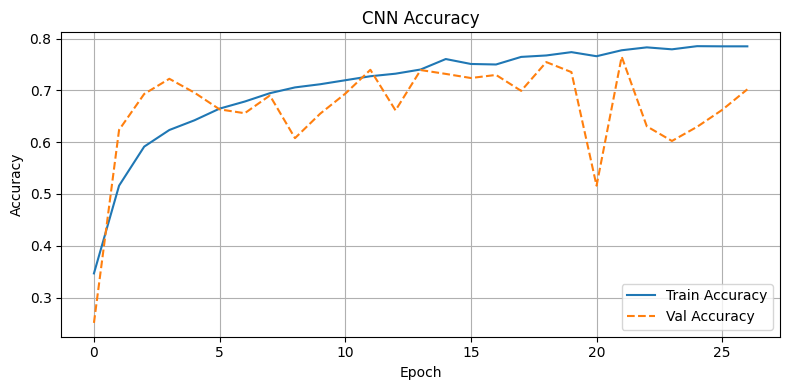

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

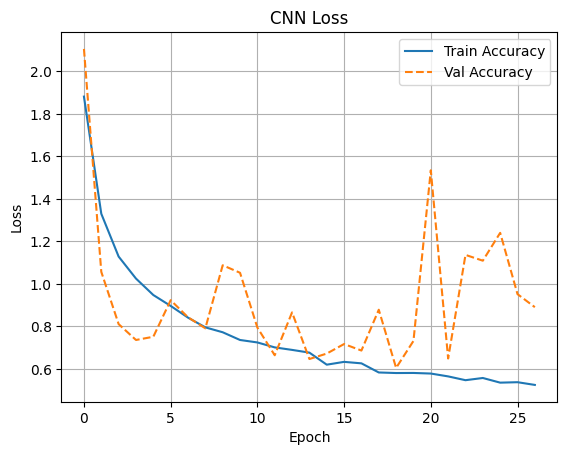

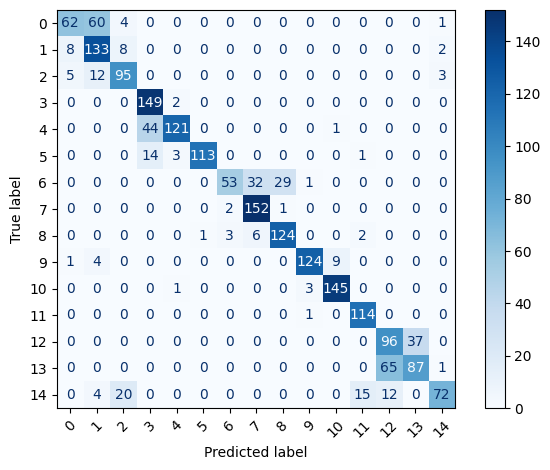

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('\n========== Evaluation ============')
#custom_cnn = tf.keras.models.load_model("cnn_3_32layers_oddFilterSizes_lr_0001.keras")
loss, accuracy = custom_cnn.evaluate(test_dataset) #evaluation values not saved. Reload saved models for evaluation
print(custom_cnn.summary)
#TODO: Uncomment if needing to save new models
#custom_cnn.save(f"cnn_3_16-64ayers_batchActivation_lr_0001_img128.keras")

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linestyle='--')
plt.title(f'CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val Accuracy', linestyle='--')
plt.title(f'CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

all_true_labels = []
all_predicted_labels = []

for images, labels in test_dataset:
    preds = custom_cnn.predict(images)
    true_labels = np.argmax(labels.numpy(), axis=1)
    predicted_labels = np.argmax(preds, axis=1)

    all_true_labels.extend(true_labels.tolist())
    all_predicted_labels.extend(predicted_labels.tolist())

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
class_indices = [str(i) for i in range(15)]
class_names = full_dataset.class_names
counter = 0
for i in range (5):
    for j in range(3):
        print(f"{counter} -- {class_names[i+j]} \t\t", end="")
        counter = counter + 1
    print("")
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_indices)
conf_display.plot(xticks_rotation=45, cmap='Blues')
plt.tight_layout()
plt.show()



In [ ]:
from tensorflow.keras.applications import DenseNet201, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

transfer_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3),
)
transfer_model.trainable = False
print(img_height ,"\t", img_width)
#sets up fully connected layer for output
x = transfer_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(15, activation='softmax')(x)

128 	 128


In [35]:
mobileNetModel = Model(inputs=transfer_model.input, outputs=output)


early = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

mobileNetModel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_mobileNet_frozen = mobileNetModel.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=early)


Epoch 1/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 108s 538ms/step - accuracy: 0.4018 - loss: 1.8459 - val_accuracy: 0.6667 - val_loss: 0.8749
Epoch 2/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 102s 533ms/step - accuracy: 0.7262 - loss: 0.6974 - val_accuracy: 0.7183 - val_loss: 0.7199
Epoch 3/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 104s 547ms/step - accuracy: 0.7733 - loss: 0.5722 - val_accuracy: 0.7326 - val_loss: 0.6721
Epoch 4/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 105s 550ms/step - accuracy: 0.7951 - loss: 0.5171 - val_accuracy: 0.7128 - val_loss: 0.7012
Epoch 5/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 105s 550ms/step - accuracy: 0.7999 - loss: 0.4854 - val_accuracy: 0.7361 - val_loss: 0.6466
Epoch 6/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 104s 545ms/step - accuracy: 0.8140 - loss: 0.4560 - val_accuracy: 0.7272 - val_loss: 0.6476
Epoch 7/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 104s 544ms/step - accuracy: 0.8249 - loss: 0.4331 - val_accuracy: 0.7515 - val_loss: 0.5991
Epoch 8/20
190/190 ━━━━━━━━━━━━━━━━━━━━ 103s 543ms/step - accuracy: 0.8313 -

In [38]:
print("\n ====== Fine tuning Results Below ====== \n")
mobileNetModel = tf.keras.models.load_model("T1_256Dense_img128.keras")
#unfreeze for finetunning
for layer in mobileNetModel.layers[-50:]:
    layer.trainable = True

mobileNetModel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_mobileNet_finetune = mobileNetModel.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=early)


 ====== Fine tuning Results Below ====== 

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 146s 683ms/step - accuracy: 0.6635 - loss: 1.1217 - val_accuracy: 0.5119 - val_loss: 1.6986
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 127s 669ms/step - accuracy: 0.8174 - loss: 0.4599 - val_accuracy: 0.5546 - val_loss: 1.5228
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 120s 628ms/step - accuracy: 0.8451 - loss: 0.3922 - val_accuracy: 0.5392 - val_loss: 1.6351
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 139s 729ms/step - accuracy: 0.8633 - loss: 0.3429 - val_accuracy: 0.5685 - val_loss: 1.5919
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 125s 656ms/step - accuracy: 0.8662 - loss: 0.3214 - val_accuracy: 0.5838 - val_loss: 1.3723
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 129s 679ms/step - accuracy: 0.8831 - loss: 0.2872 - val_accuracy: 0.6761 - val_loss: 1.0162
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 119s 625ms/step - accuracy: 0.9032 - loss: 0.2427 - val_accuracy: 0.7202 - val_loss: 0.8593
Epoch 8/30
190/190 ━━━━━━━━━━━━━

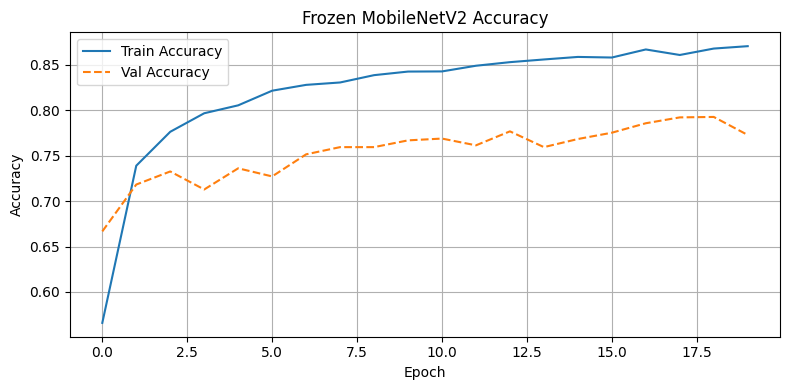

65/65 ━━━━━━━━━━━━━━━━━━━━ 63s 558ms/step
0 -- Apple Formalin-mixed 		1 -- Apple Fresh 		2 -- Apple Rotten 		
3 -- Apple Fresh 		4 -- Apple Rotten 		5 -- Banana Formalin-mixed 		
6 -- Apple Rotten 		7 -- Banana Formalin-mixed 		8 -- Banana Fresh 		
9 -- Banana Formalin-mixed 		10 -- Banana Fresh 		11 -- Banana Rotten 		
12 -- Banana Fresh 		13 -- Banana Rotten 		14 -- Grape Formalin-mixed 		


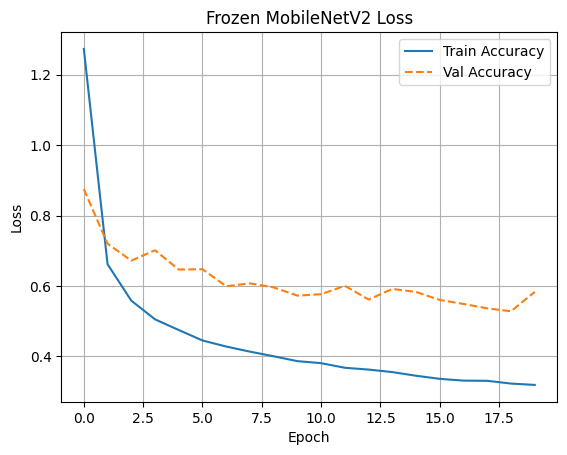

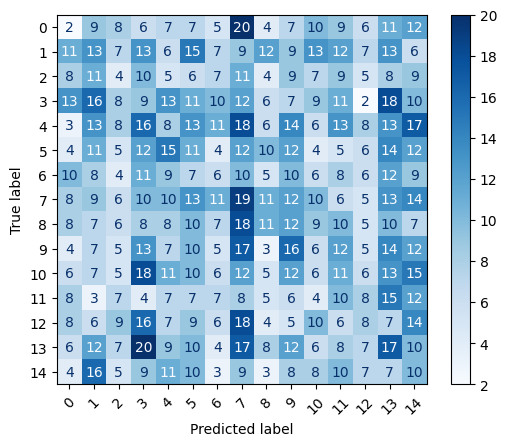

<Figure size 2000x1200 with 0 Axes>

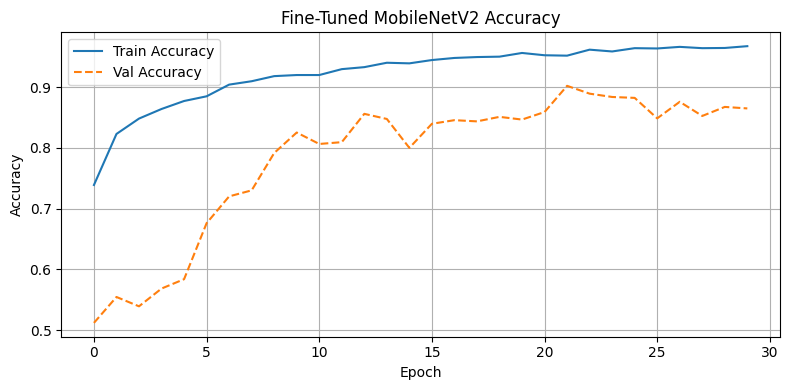

65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 304ms/step
0 -- Apple Formalin-mixed 		1 -- Apple Fresh 		2 -- Apple Rotten 		
3 -- Apple Fresh 		4 -- Apple Rotten 		5 -- Banana Formalin-mixed 		
6 -- Apple Rotten 		7 -- Banana Formalin-mixed 		8 -- Banana Fresh 		
9 -- Banana Formalin-mixed 		10 -- Banana Fresh 		11 -- Banana Rotten 		
12 -- Banana Fresh 		13 -- Banana Rotten 		14 -- Grape Formalin-mixed 		


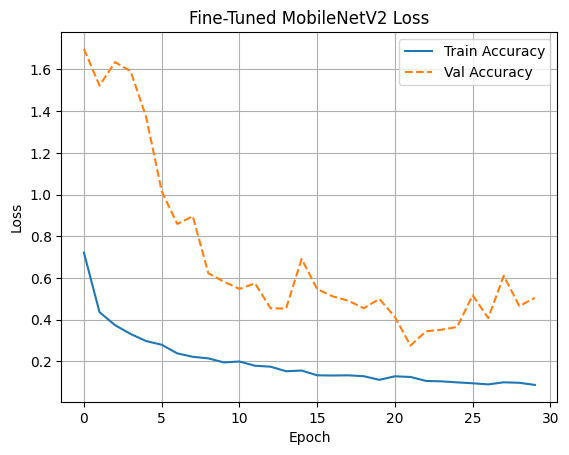

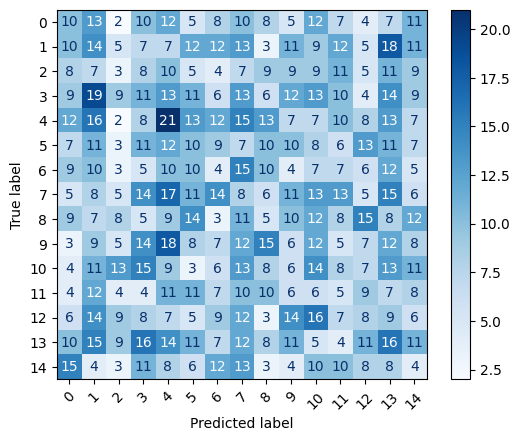

<Figure size 2000x1200 with 0 Axes>

In [ ]:
#Plot MobileNetV2 model
import matplotlib.pyplot as plt

T1 = tf.keras.models.load_model("T1_256Dense_img128.keras")
T2 = tf.keras.models.load_model("T2_50_Dense256_img128.keras")
plt.figure(figsize=(8, 4))
plt.plot(history_mobileNet_frozen.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobileNet_frozen.history['val_accuracy'], label='Val Accuracy', linestyle='--')
plt.title(f'Frozen MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(history_mobileNet_frozen.history['loss'], label='Train Accuracy')
plt.plot(history_mobileNet_frozen.history['val_loss'], label='Val Accuracy', linestyle='--')
plt.title(f'Frozen MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#=================================== Fine tuned below ========================================
print("\n\n\n\n")



plt.figure(figsize=(8, 4))
plt.plot(history_mobileNet_finetune.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobileNet_finetune.history['val_accuracy'], label='Val Accuracy', linestyle='--')
plt.title(f'Fine-Tuned MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.plot(history_mobileNet_finetune.history['loss'], label='Train Accuracy')
plt.plot(history_mobileNet_finetune.history['val_loss'], label='Val Accuracy', linestyle='--')
plt.title(f'Fine-Tuned MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


In [43]:
lossT1, accuracyT1 = T1.evaluate(test_dataset)
lossT2, accuractT2 = T2.evaluate(test_dataset)

65/65 ━━━━━━━━━━━━━━━━━━━━ 47s 315ms/step - accuracy: 0.8101 - loss: 0.4644
65/65 ━━━━━━━━━━━━━━━━━━━━ 48s 334ms/step - accuracy: 0.9024 - loss: 0.3014


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

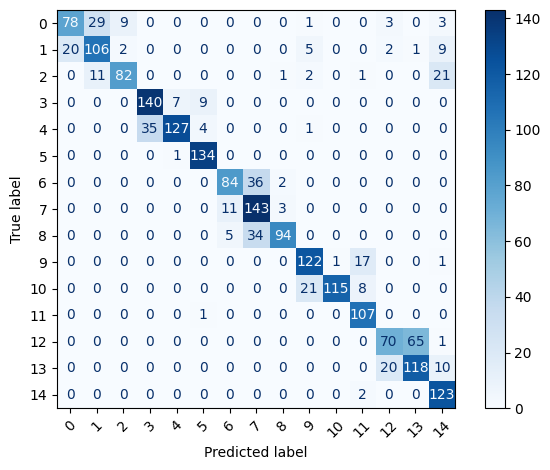

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

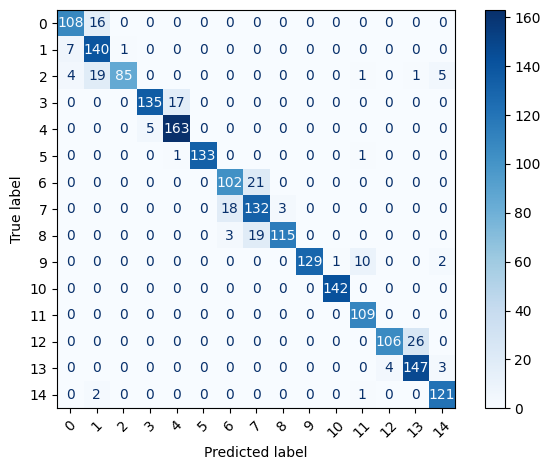

In [42]:
all_true_labels = []
all_predicted_labels = []

for images, labels in test_dataset:
    preds = T1.predict(images)
    true_labels = np.argmax(labels.numpy(), axis=1)
    predicted_labels = np.argmax(preds, axis=1)

    all_true_labels.extend(true_labels.tolist())
    all_predicted_labels.extend(predicted_labels.tolist())

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
class_indices = [str(i) for i in range(15)]
class_names = full_dataset.class_names
counter = 0
for i in range (5):
    for j in range(3):
        print(f"{counter} -- {class_names[i+j]} \t\t", end="")
        counter = counter + 1
    print("")
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_indices)
conf_display.plot(xticks_rotation=45, cmap='Blues')
plt.tight_layout()
plt.show()


all_true_labels = []
all_predicted_labels = []

for images, labels in test_dataset:
    preds = T2.predict(images)
    true_labels = np.argmax(labels.numpy(), axis=1)
    predicted_labels = np.argmax(preds, axis=1)

    all_true_labels.extend(true_labels.tolist())
    all_predicted_labels.extend(predicted_labels.tolist())

conf_matrix = confusion_matrix(all_true_labels, all_predicted_labels)
class_indices = [str(i) for i in range(15)]
class_names = full_dataset.class_names
counter = 0
for i in range (5):
    for j in range(3):
        print(f"{counter} -- {class_names[i+j]} \t\t", end="")
        counter = counter + 1
    print("")
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_indices)
conf_display.plot(xticks_rotation=45, cmap='Blues')
plt.tight_layout()
plt.show()